In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

# <span style="color:red">ch1. NLTK 자연어처리 패키지</span>
# 1. NLTK 패키지
- 자연어 처리를 위한 강력하고 사용하기 쉬운 라이브러리
1. 텍스트 전처리 : 토큰화(어절, 문장나누기), 정규화(정규표현식 활용), 불용어 제거, 표제어추출(기본형태로 변환)
2. 품사태깅 : 단어 품사 식별
3. 어휘 데이터 베이스 사용
4. 구조화된 문서의 빈도수, 분류분석, 연관분석, 감정분석 (단점 - 속도가 느림)
```
pip install nltk
```

In [2]:
import nltk

In [3]:
# 말뭉치를 다운로드
# c:/nltk_data
# d:/nltk_data
# c:/Users/내컴퓨터이름/nltk_data
# c:/Users/내컴퓨터이름/anaconda3/nltk_data
# c:/Users/내컴퓨터이름/anaconda3/lib/nltk_data
# c:/Users/내컴퓨터이름/anaconda3/share/nltk_data
# c:/Users/내컴퓨터이름/Appdata/Roaming/nltk_data
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
# 말뭉치 리스트
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
# 말뭉치 데이터 셋(소설 emma 내용)
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
emma[:40]

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCH'

In [7]:
# emma의 글자수, 문장수, 단어수
print("글자수 : ",len(emma))

글자수 :  887071


In [8]:
# sent_tokenize() : 문장단위로 나눠 list로 반환
from nltk.tokenize import sent_tokenize
sent_tokens = sent_tokenize(emma)
print("문장수 : ", len(sent_tokens))
print("%r" % sent_tokens[0])

문장수 :  7456
"Even before Miss Taylor had ceased to hold the nominal\noffice of governess, the mildness of her temper had hardly allowed\nher to impose any restraint; and the shadow of authority being\nnow long passed away, they had been living together as friend and\nfriend very mutually attached, and Emma doing just what she liked;\nhighly esteeming Miss Taylor's judgment, but directed chiefly by\nher own."


In [10]:
# word_tokenize() : 단어단위로 나눠 list로 반환
from nltk.tokenize import word_tokenize
print(word_tokenize(sent_tokens[0]))

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']


In [11]:
print("단어수 : ", len(word_tokenize(emma)))

단어수 :  191776


In [14]:
# RegexpTokenizer() : 토큰화할 때 해당 정규표현식에 해당하는 word만 적용
from nltk.tokenize import RegexpTokenizer
digitRet = RegexpTokenizer("\d+")
alphaRet = RegexpTokenizer("\w+")
digits = digitRet.tokenize(sent_tokens[0])
print(digits)
words = alphaRet.tokenize(sent_tokens[0])
print(words)

['1816']
['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her']


# 2. 형태소(의미 있는 가장 작은 단위) 분석

In [15]:
words2 = ['sending', 'cooking', 'files', 'lives', 'crying', 'dying']
# 어간추출(1) : PorterStemmer
from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst.stem(words2[0])

'send'

In [16]:
[pst.stem(word) for word in words2]

['send', 'cook', 'file', 'live', 'cri', 'die']

In [17]:
# 어간추출(2) - 어간 추출하는 것 중 제일 높은 빈도
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
[lst.stem(word) for word in words2]

['send', 'cook', 'fil', 'liv', 'cry', 'dying']

In [19]:
# 어간추출(3) - RegexpStemmer : 정규표현식에 해당하는 부분만 어간 추출
from nltk.stem import RegexpStemmer
rst = RegexpStemmer('ing')
[rst.stem(word) for word in words2]

['send', 'cook', 'files', 'lives', 'cry', 'dy']

In [20]:
# 품사태깅
from nltk.tag import pos_tag
tagged_list = pos_tag(word_tokenize(sent_tokens[0]))
print(word_tokenize(sent_tokens[0]))
print('품사태깅한 결과 :', tagged_list)

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']
품사태깅한 결과 : [('[', 'NNS'), ('Emma', 'NNP'), ('by', 'IN'), ('Jane', 'NNP'), ('Austen', 'NNP'), ('1816', 'CD'), (']', 'NNP'), ('VOLUME', 'NNP'), ('I', 'PRP'), ('CHAPTER', 'VBP'), ('I', 'PRP'), ('Emma', 'NNP'), ('Woodhouse', 'NNP'), (',', ','), ('handsome', 'NN'), (',', ','), ('clever', 'NN'), (',', ','), ('and', 'CC'), ('rich', 'JJ'), (',', ','), ('with', 'IN'), ('a', 'DT'), ('comfortable', 'JJ'), ('home', 'NN'), ('and', 'CC'), ('happy', 'JJ'), ('disposition', 'NN'), (',', ','), ('seemed', 'VBD'), ('to', 'TO'), ('unite', 'VB'),

# 퀴즈 : emma소설안에서
1. 특수문자가 들어가지 않는 3글자 이상의 단어만 추출해서 품사태킹을 하시오. ex)[('emma','명'), ('was','동'),...]
2. "Emma" 단어가 몇번 등장하며, 품사 태깅이 어떤 품사들로 되어 있는지 모두 출력하시오
3. 내가 원하는 품사(명사)의 단어만 뽑아 등장하는 명사의 종류 갯수를 출력하시오

In [27]:
# 1.
from nltk.tokenize import RegexpTokenizer
ret = RegexpTokenizer('[a-zA-Z0-9]{3,}')
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
emma_words = ret.tokenize(emma)
emma_tags = pos_tag(emma_words)
print("emma 소설에서 3글자 이상의 단어 출현 수 : ", len(emma_words), len(emma_tags))
print("emma 소설에서 3글자 이상의 단어 종류 수 : ", len(set(emma_words)),len(set(emma_tags)))
# 한 단어가 다른 품사로 태깅될 수 있음

emma 소설에서 3글자 이상의 단어 출현 수 :  123817 123817
emma 소설에서 3글자 이상의 단어 종류 수 :  7470 11434


In [28]:
print(emma_words[:5])
print(emma_tags[:5])

['Emma', 'Jane', 'Austen', '1816', 'VOLUME']
[('Emma', 'NNP'), ('Jane', 'NNP'), ('Austen', 'NNP'), ('1816', 'CD'), ('VOLUME', 'NNP')]


In [32]:
# 2. "Emma" 단어가 몇 번 등장하며, 품사 태깅이 어떤 품사들로 되어 있는지 모두 출력하시오
# pos = [] # 품사만
# for emma_tag in emma_tags :
#     if emma_tag[0] == 'Emma' :
#         pos.append(emma_tag[1])
pos = [emma_tag[1] for emma_tag in emma_tags if emma_tag[0]=='Emma']        
print("Emma 출현횟수 : ", len(pos))
print("Emma의 품사 : ", set(pos))
# VBP', 'JJ', 'NN', 'VBN', 'VB', 'NNPS', 'RB', 'NNP', 'NNS', 'VBD'
# 동사, 형용사, 명사, 동사과거분사, 동사, 고유명사복수, 고유명사, 명사복수형, 동사과거형

Emma 출현횟수 :  865
Emma의 품사 :  {'VBP', 'JJ', 'NN', 'VBN', 'VB', 'NNPS', 'RB', 'NNP', 'NNS', 'VBD'}


In [38]:
# emma_tags에서 각 품사별 몇 개씩 태그되었는지
# set(pos) # Emma의 품사
pos_cnt = dict() # 딕셔너리
for word, tag in emma_tags :
    if word=="Emma" :
        if tag in pos_cnt :
            pos_cnt[tag] += 1
        else :
            pos_cnt[tag] = 1
print(pos_cnt)

{'NNP': 838, 'VBP': 4, 'JJ': 4, 'VB': 5, 'NNS': 2, 'RB': 1, 'NN': 7, 'NNPS': 2, 'VBN': 1, 'VBD': 1}


In [40]:
# emma_tags에서 각 품사별 몇 개씩 태그되었는지
import pandas as pd
pos_cnt = pd.Series([0]*len(set(pos)), index=set(pos))
for word, tag in emma_tags :
    if word=='Emma' :
        pos_cnt[tag] += 1
pos_cnt.sort_values(ascending=False)

NNP     838
NN        7
VB        5
VBP       4
JJ        4
NNPS      2
NNS       2
VBN       1
RB        1
VBD       1
dtype: int64

In [48]:
# 3.내가 원하는 품사(명사)의 단어만 뽑아 등장하는 명사의 종류 갯수를 출력하시오
nouns_list = [word for word, tag in emma_tags if (tag=='NN') 
                                              | (tag=='NNS') 
                                              | (tag=='NNP') 
                                              | (tag=='NNPS')] # 명사들만
# for word, tag in emma_tags :
#     if (tag=='NN') | (tag=='NNS') | (tag=='NNP') | (tag=='NNPS') :
#         nouns_list.append(word)
print("명사가 나온 횟수 : ", len(nouns_list))
print("출연한 명사 갯수 : ", len(set(nouns_list)))
print("각 단어당 나오는 평균 빈도수 : ", len(nouns_list) / len(set(nouns_list)))

명사가 나온 횟수 :  30633
출연한 명사 갯수 :  4067
각 단어당 나오는 평균 빈도수 :  7.5320875338087045


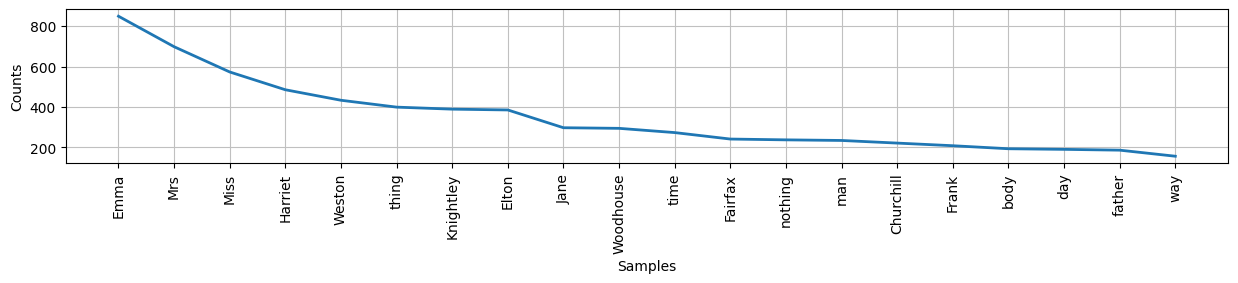

In [52]:
# 최빈 단어 시각화
import matplotlib.pyplot as plt
from nltk import Text
emma_text = Text(nouns_list)
plt.figure(figsize=(15,2))
emma_text.plot(20)
plt.show()

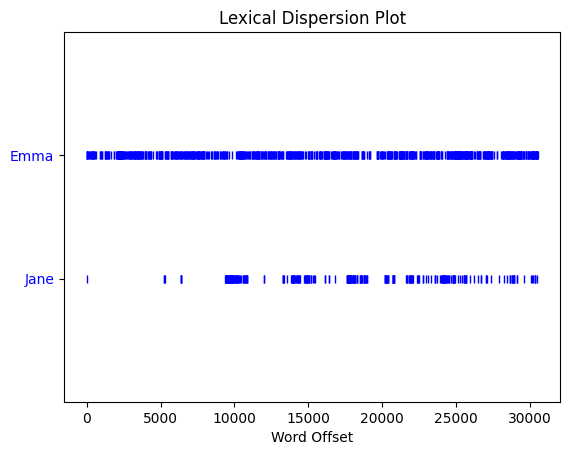

In [53]:
emma_text.dispersion_plot(['Emma', 'Jane'])

In [57]:
# 고유명사
names_list = [word for word, tag in emma_tags if (tag=="NNP") | (tag=="NNPS")]
print("고유명사의 개수 : ",len(set(names_list)))
from nltk import FreqDist
FreqDist(names_list) # 빈도를 반환

고유명사의 개수 :  577


FreqDist({'Emma': 840, 'Mrs': 698, 'Miss': 572, 'Harriet': 484, 'Weston': 433, 'Knightley': 389, 'Elton': 384, 'Jane': 295, 'Woodhouse': 294, 'Fairfax': 241, ...})

In [62]:
dic = dict(FreqDist(names_list))
wordcnt = pd.Series(dic)
wordcnt.sort_values(ascending=False)

Emma        840
Mrs         698
Miss        572
Harriet     484
Weston      433
           ... 
Call          1
Barnes        1
Balls         1
Fourteen      1
FINIS         1
Length: 577, dtype: int64

In [63]:
wordcnt[wordcnt>400]

Emma       840
Miss       572
Weston     433
Mrs        698
Harriet    484
dtype: int64

In [64]:
names = wordcnt[wordcnt>400]
names.index

Index(['Emma', 'Miss', 'Weston', 'Mrs', 'Harriet'], dtype='object')

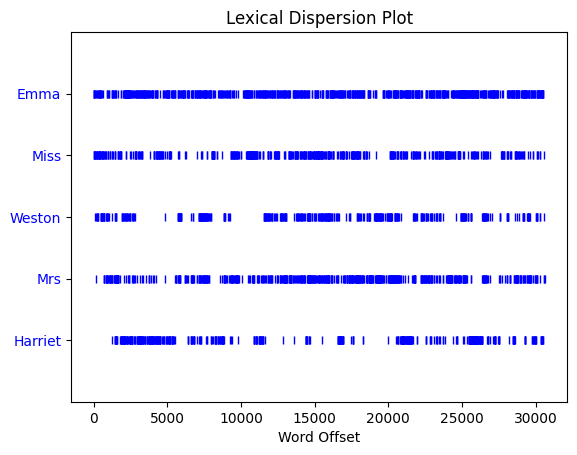

In [67]:
emma_text.dispersion_plot(list(names.index))